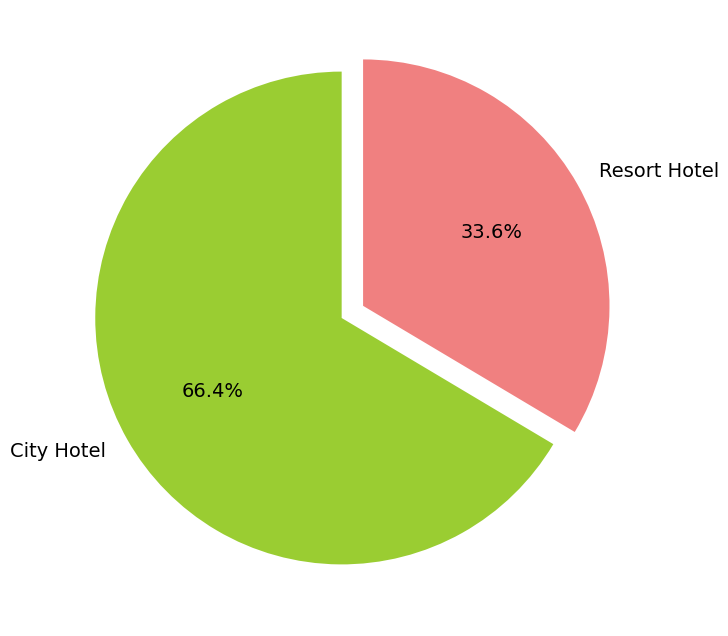

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

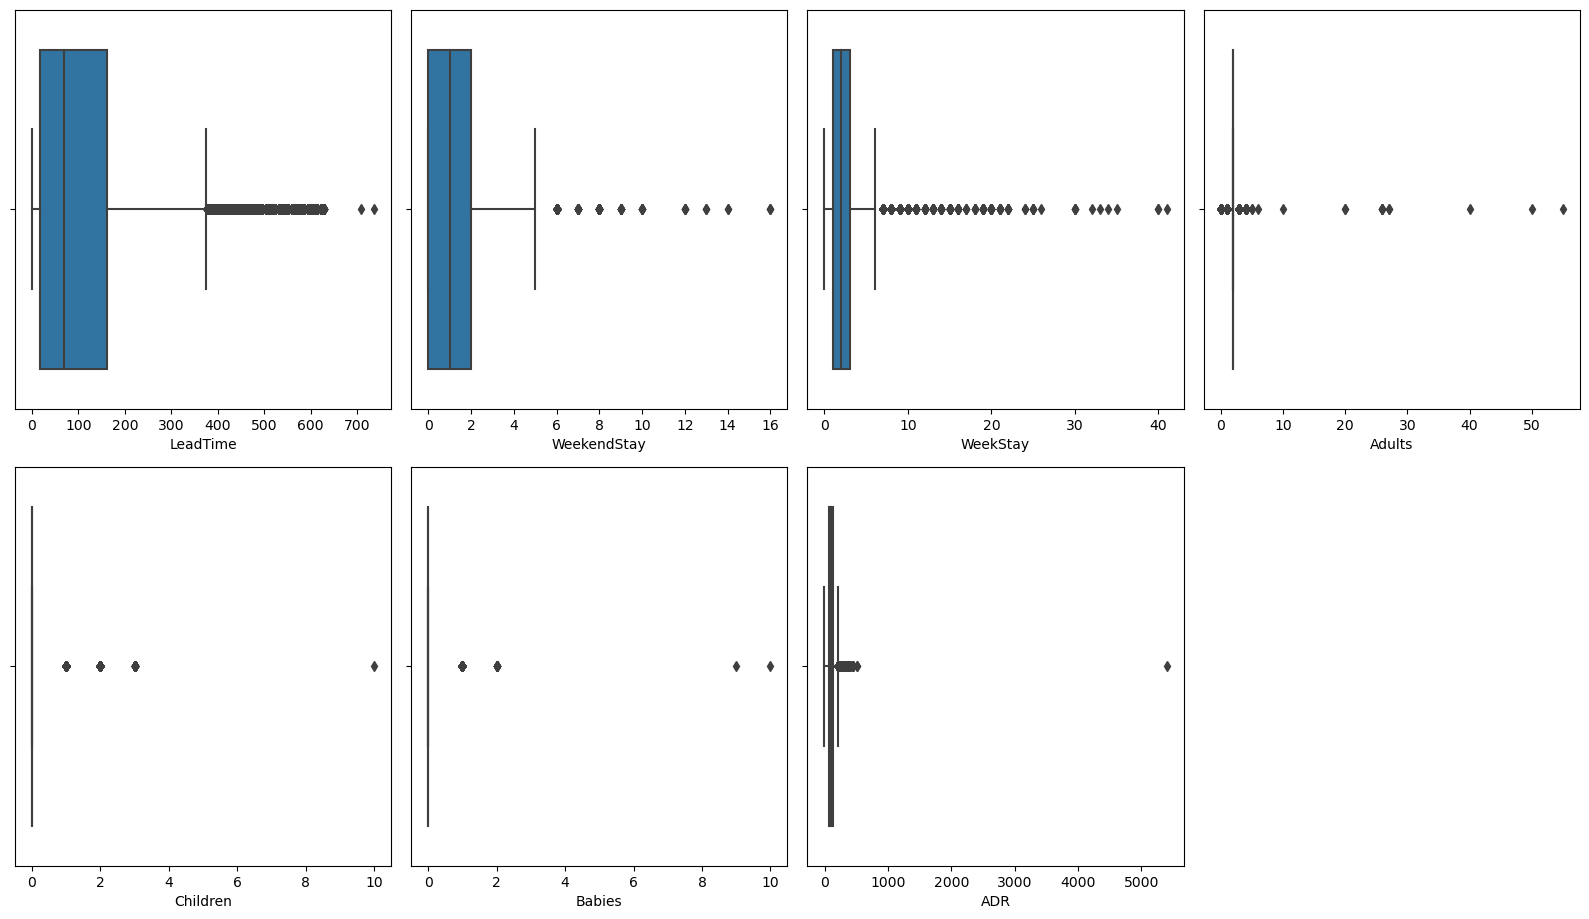

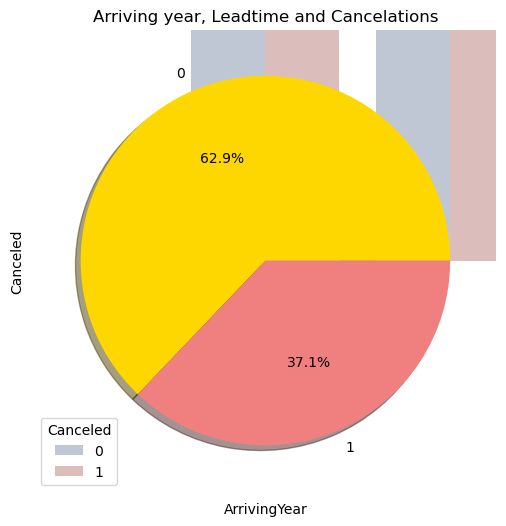

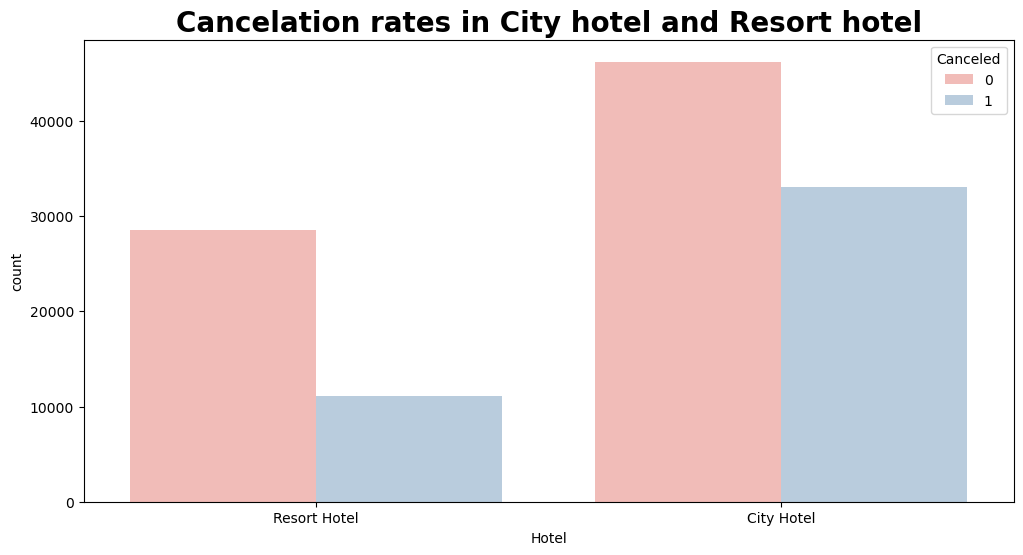

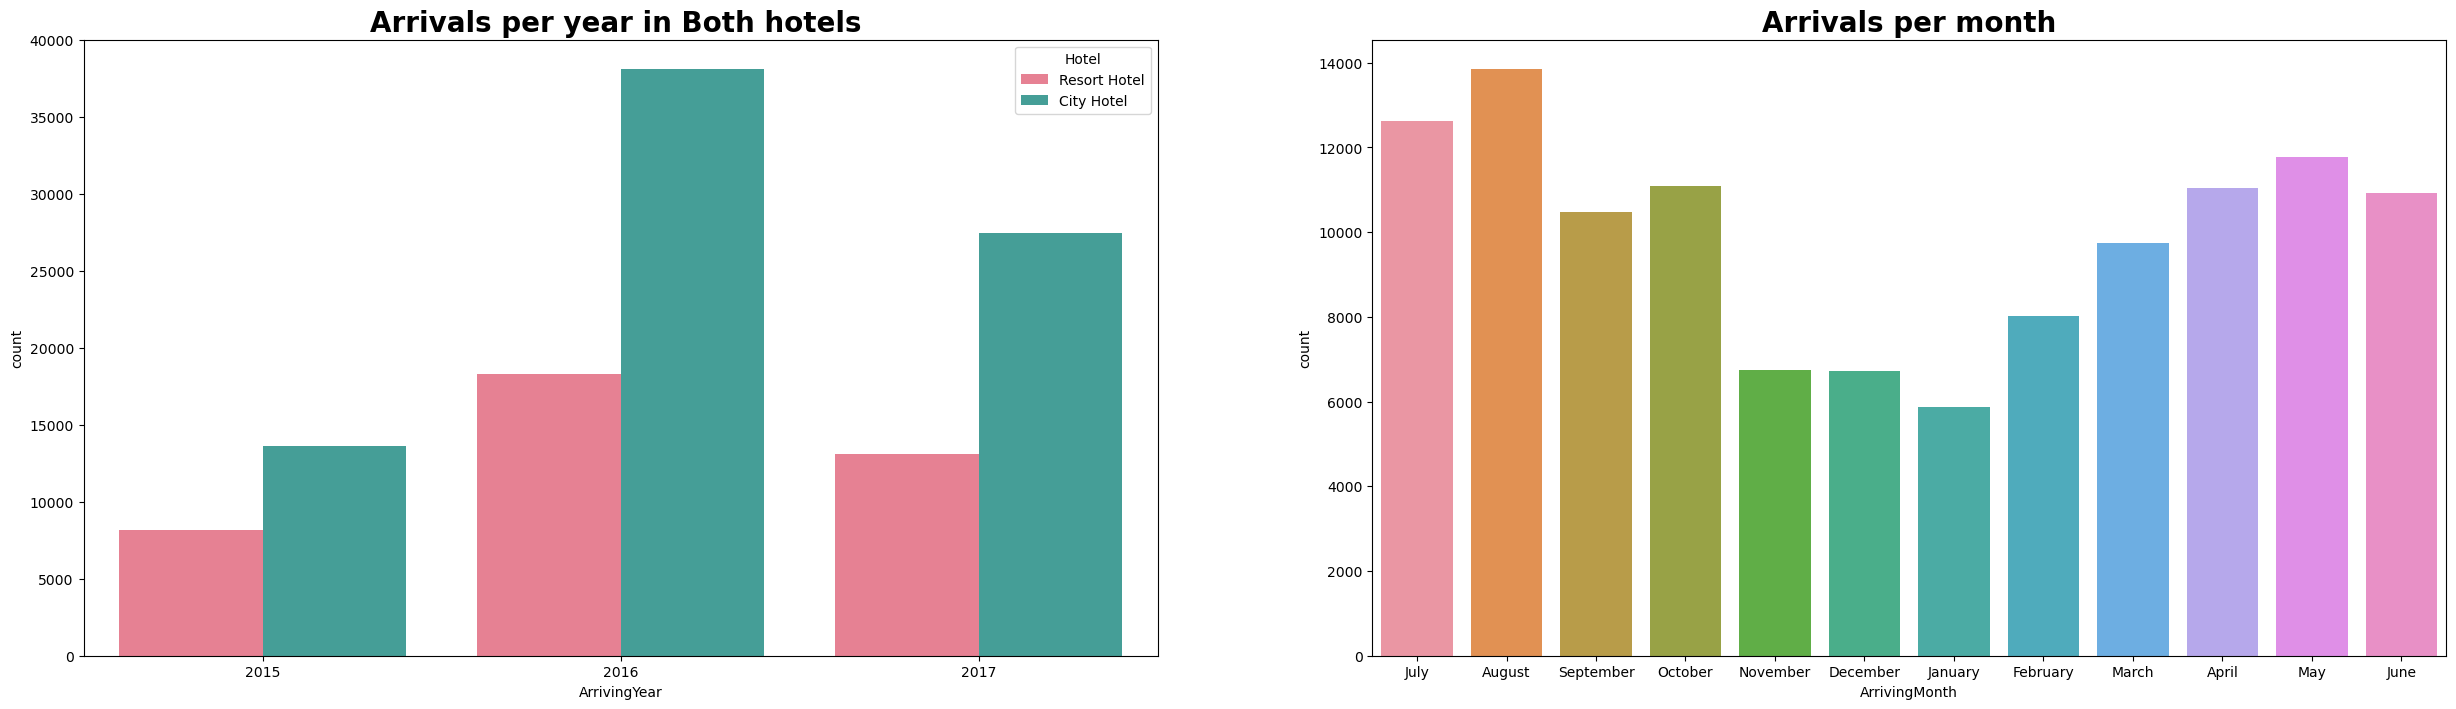

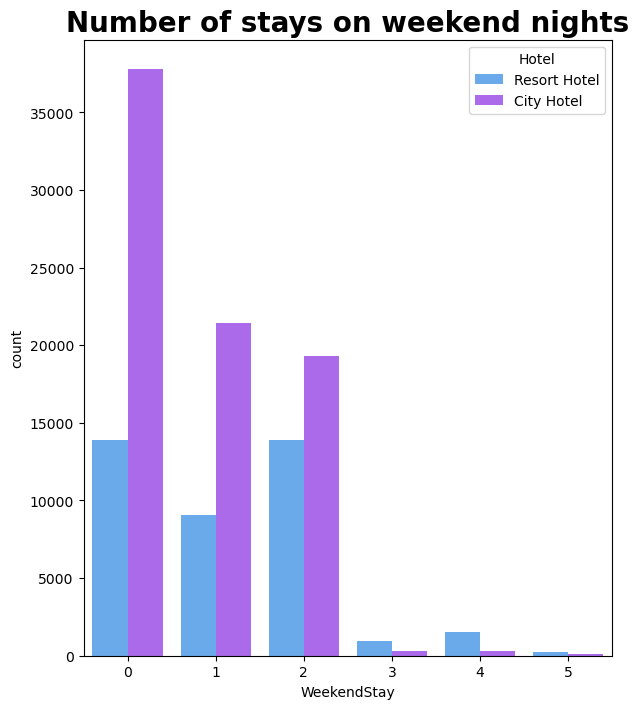

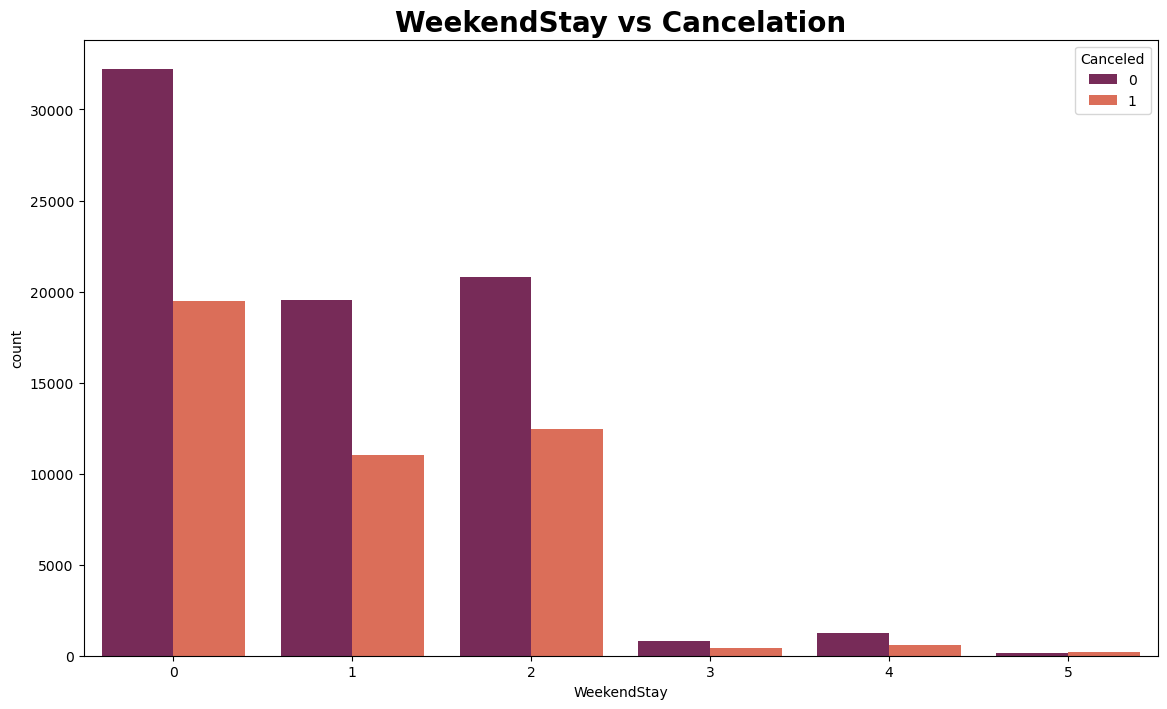

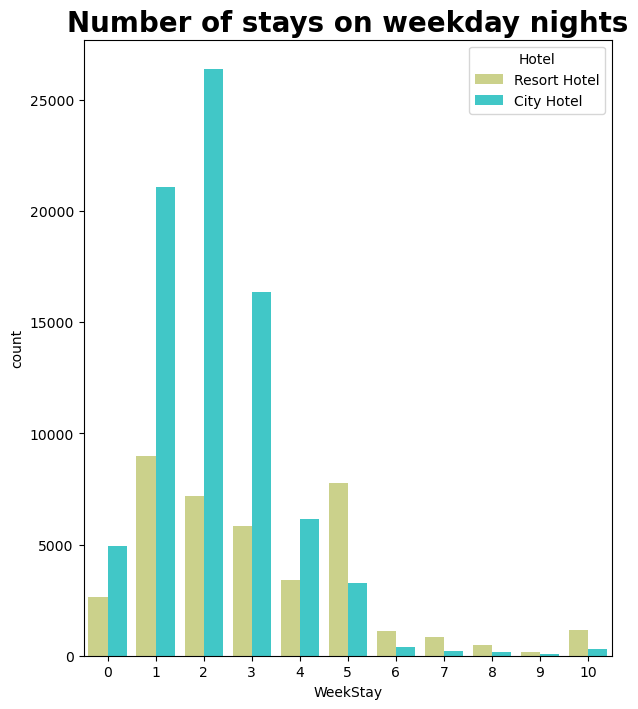

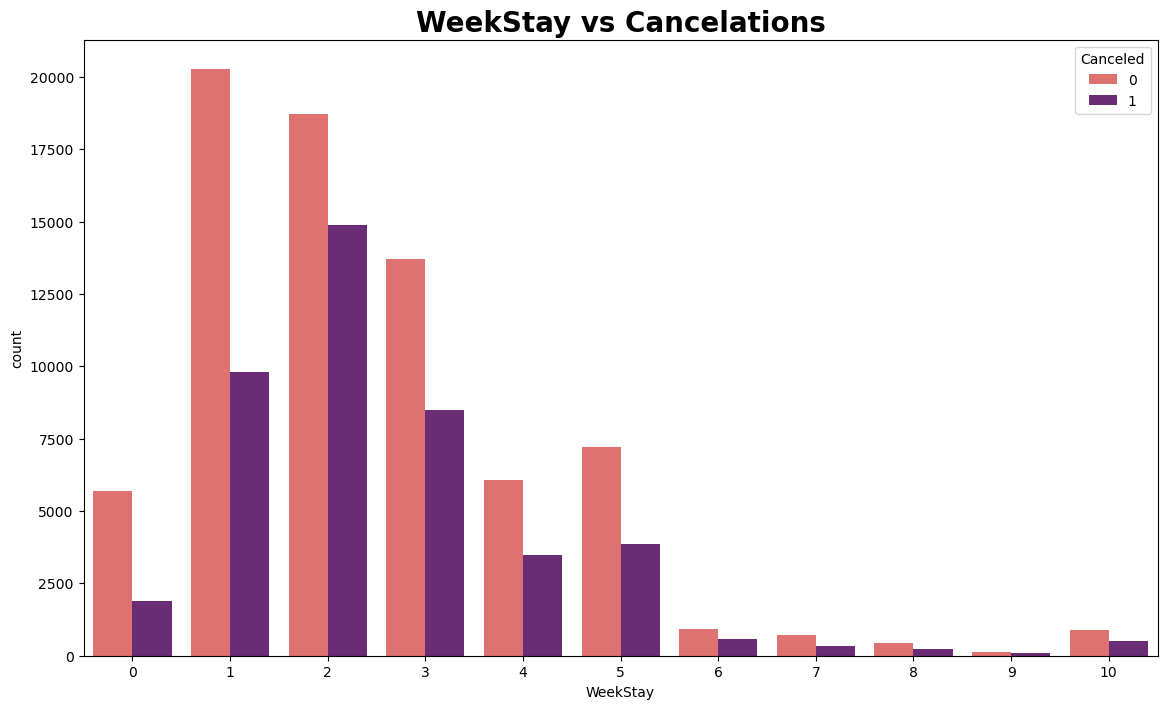

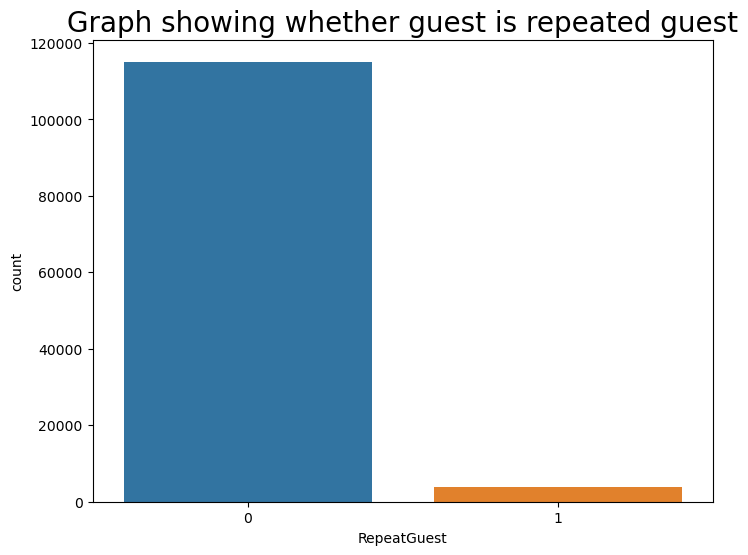

C:\Users\HP\AppData\Local\Temp\ipykernel_2216\3374934153.py:355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_guests['price'] = actual_guests['ADR'] * (actual_guests['WeekendStay'] + actual_guests['WeekStay'])


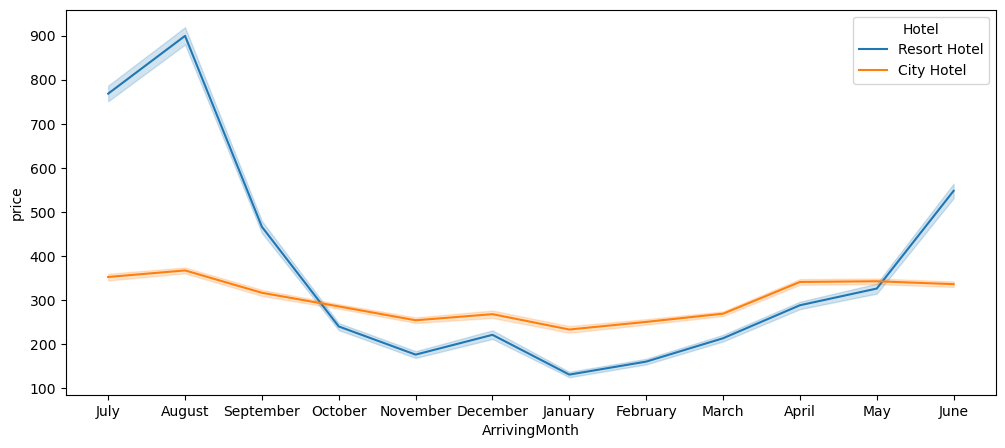

'prices of resort hotel are higher in the month of june and july'

In [8]:
# -*- coding: utf-8 -*-
"""UC-5951.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1pL8XwpY1Rdh3mqJhLpvSNhUERaLCxHal
"""

# Commented out IPython magic to ensure Python compatibility.
# Importing neccesary libraries.

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)

"""reading and inspection of data"""

hotel= pd.read_csv("C:\\Users\\HP\\Downloads\\UC-5951-hotel_bookings.csv")
#hotel.head()

#hotel.describe()

#hotel.info()

"""the hotel has 32 variables having one dependent variable "is_cancelled"

comparison between city and resort hotel
"""

# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = hotel['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()
#plt.savefig('22086682.png',dpi=300)

"""Resort Hotel tend to be on the expensive side and most people will just stick with city hotel.

#Cleaning the data
"""

#Checking the missing values in the columns

hotel.isnull().sum()

#Column-wise null percentage

#print(round(100*(hotel.isnull().sum()/len(hotel.index)),2))

"""variables like agent and company have high missing values therefore they will be dropped

"""

hotel=hotel.drop(['agent','company'],axis=1)

"""removing further NaN values

"""

hotel = hotel.dropna(axis = 0)

hotel.isnull().sum()

"""rename the coloumns for better readibility"""

hotel.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays',
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

"""identifying continuous and categorical variables"""

def var(hotel):
    unique_list = pd.DataFrame([[i,len(hotel[i].unique())] for i in hotel.columns])
    unique_list.columns = ['name','uniques']

    total_var = set(hotel.columns)
    cat_var = set(unique_list.name[(unique_list.uniques<=12)      |
                                   (unique_list.name=='Country')  |
                                   (unique_list.name=='Agent')
                                  ])
    con_var = total_var - cat_var

    return cat_var, con_var


cat_var, con_var = var(hotel)

'''print("Continuous Variables (",len(con_var),")\n",con_var,'\n\n'
      "Categorical Variables(",len(cat_var),")\n",cat_var)'''

"""checking the outliers

"""

# Creating a boxplot for Outlier detection
features = ['LeadTime', 'WeekendStay', 'WeekStay', 'Adults','Children', 'Babies','ADR']
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,4,n)
    sns.boxplot(hotel[feature])
    n+=1
    plt.tight_layout()

"""checking outliers

"""

#Checking outliers in continuous variables
hotel[con_var].describe()

"""imputing the outliers for continuous variable"""

hotel.loc[hotel.LeadTime      > 500,'LeadTime'     ]=500
hotel.loc[hotel.WaitingDays   >   0,'WaitingDays'  ]=  1
hotel.loc[hotel.WeekendStay   >=  5,'WeekendStay'  ]=  5
hotel.loc[hotel.Adults        >   4,'Adults'       ]=  4
hotel.loc[hotel.PrevBook      >   0,'PrevBook'     ]=  1
hotel.loc[hotel.PrevCancel    >   0,'PrevCancel'   ]=  1
hotel.loc[hotel.WeekStay      >  10,'WeekStay'     ]= 10
hotel.loc[hotel.ChangeBooking >   5,'ChangeBooking']=  5

cat_var = set(list(cat_var) + ['PrevBook','PrevCancel'])
con_var = set(hotel.columns) - cat_var

hotel[con_var].describe()

#outliers in categorical variables
hotel[cat_var].describe()

hotel.loc[hotel.Babies    > 8,'Babies']    = 0
hotel.loc[hotel.ParkSpace > 5,'ParkSpace'] = 0
hotel.loc[hotel.Children  > 8,'Children']  = 0

hotel[cat_var].describe()

"""outleirs have been treated

#data preperation
data has to prepared for the proper visualization
"""

#Lets combine children and babies together as kids
hotel['Kids'] = hotel.Children + hotel.Babies

#Combine total mumbers by adding kids and adults
hotel['total_members'] = hotel.Kids + hotel.Adults
#convert the datatypes to string
hotel['ArrivingYear'] = hotel['ArrivingYear'].astype('str')
hotel['ArrivingMonth'] = hotel['ArrivingMonth'].astype('str')
hotel['ArrivingDate'] = hotel['ArrivingDate'].astype('str')

hotel['Canceled'] = hotel['Canceled'].astype('str')
hotel['RepeatGuest'] = hotel['RepeatGuest'].astype('str')
# Lets convert arrival date to datetime
hotel['Arrival Date'] = hotel['ArrivingDate'] + '-' + hotel['ArrivingMonth'] + '-' + hotel['ArrivingYear']
hotel['Arrival Date'] = pd.to_datetime(hotel['Arrival Date'], errors='coerce')

confirmed_bookings = hotel[hotel.Canceled=='0']

import datetime as dt
confirmed_bookings['ArrivingMonth'] = hotel['Arrival Date'].dt.month
final=confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

"""#Exploratory data analysis
eda is also necessary for data visualization
"""
'''
print('Total Bookings canceled')
print('-'*50)
print(hotel.Canceled.value_counts())
print('-'*50)
print('*'*75)
print('Cancelation percentage in both hotels ')
print('-'*50)
print(hotel.Canceled.value_counts(normalize=True))
'''

"""37% bookings are cancelled

identifying the countries
"""

hotel.Country.value_counts(normalize=True)

"""Around 40% of all bookings were booked from Portugal followed by Great Britain(10%) & France(8%).

identifying the busisest month and the least ocuppied month
"""

hotel.ArrivingMonth.value_counts(normalize=True)

"""August is the most occupied (busiest) month with 11.62% bookings and January is the most unoccupied month with 4.96% bookings.

identifying the market segment
"""

hotel.Segment.value_counts(normalize=True)

"""Around 47% of bookings are made via Online Travel Agents, almost 20% of bookings are made via Offline Travel Agents and less than 20% are Direct bookings without any other agents.

identifying the booking years
"""

hotel.ArrivingYear.value_counts(normalize=True)

"""47% bookings were done in 2016, 34% in 2017 and 18 percent in 2015.. We can see increasing tendency in bookings year wise

identifying the most ordered meal
"""

hotel.Meal.value_counts(normalize=True)

"""Out of all the meals, BB (Bed & Breakfast) is the most ordered meal which is around 77.2%, followed by HB(Half Board), SC(no meal package), Undefined and FB (Full Board).

identifying the type of customers
"""

hotel.CustomerType.value_counts(normalize=True)

"""Transient type of customers are the more around 75%"""

hotel.Reservation.value_counts(normalize=True)

"""as it is observed that around 63% visitors checked out and 36% bookings were canceled

after all the detection of parameters, data cleaning and data processing, data visualization will take place.

#data visualization
"""

plt.figure(figsize=(12,6))
sns.barplot(x='ArrivingYear', y='LeadTime',hue='Canceled', data= hotel, palette='vlag')
plt.title('Arriving year, Leadtime and Cancelations')

cols = ['gold', 'lightcoral']
hotel['Canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

"""63% of bookings were not canceled and 37% of the bookings were canceled at the Hotel."""

plt.figure(figsize=(12, 6))

sns.countplot(x='Hotel',hue="Canceled", data=hotel,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()
#plt.savefig('22086682.png',dpi=300)

"""Most bookings were in city hotel
Cancelations in Resort hotel is less compared to city hotel

### Arrivals in month and year
"""

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='ArrivingYear',hue='Hotel', data=hotel,palette='husl')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'ArrivingMonth')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()
#plt.savefig('22086682.png',dpi=300)

"""most of the bookings were in the year 2016 and bookings were done in City hotel.
Most bookings were done in the month of May,June, July, August
"""

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekendStay',hue='Hotel', data=hotel, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.show()
#plt.savefig('22086682.png',dpi=300)

"""most of the weekend nights were booked in City Hotel"""

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'WeekendStay', hue='Canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()
#plt.savefig('22086682.png',dpi=300)

"""most of weekend nights which booked were not canceled

### WeekStay
"""

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekStay',hue='Hotel', data=hotel, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)

"""Weekday night stays were more in City Hotel"""

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'WeekStay', hue='Canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()
#plt.savefig('22086682.png',dpi=300)

"""Less cancelations were observed

### Repeat guest
"""

plt.figure(figsize=(8,6))
sns.countplot(data = hotel, x = 'RepeatGuest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()
#plt.savefig('22086682.png',dpi=300)

"""### Low number of repeated guests.
### A need to target repeated guests since they have booked before. **

Looking into prices per month per hotel
average daily rate =  SumOfAllLodgingTransactionTotalNumberOfStayingNight

average daily rate per person =  ADRAdults+Children

We will need to find out average daily rate per person
"""

plt.figure(figsize=(12,5))

# Calculating average daily rate per person
hotel['adr_pp'] = hotel['ADR'] / (hotel['Adults'] + hotel['Children'])
actual_guests = hotel.loc[hotel["Canceled"] == '0']
actual_guests['price'] = actual_guests['ADR'] * (actual_guests['WeekendStay'] + actual_guests['WeekStay'])
sns.lineplot(data = actual_guests, x = 'ArrivingMonth', y = 'price', hue = 'Hotel')
plt.show()
#plt.savefig('22086682.png',dpi=300)

"""prices of resort hotel are higher in the month of june and july"""